In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/content/drive/My Drive/ProbAndStats/q4.dat', sep ='\t', header=None)

In [0]:
data.columns = ['time', 'value']

In [0]:
n = data.shape[0]

In [0]:
partition_data = np.array_split(data,4)

In [0]:
np.sum(partition_data[0].time*partition_data[0].value)

1488069079

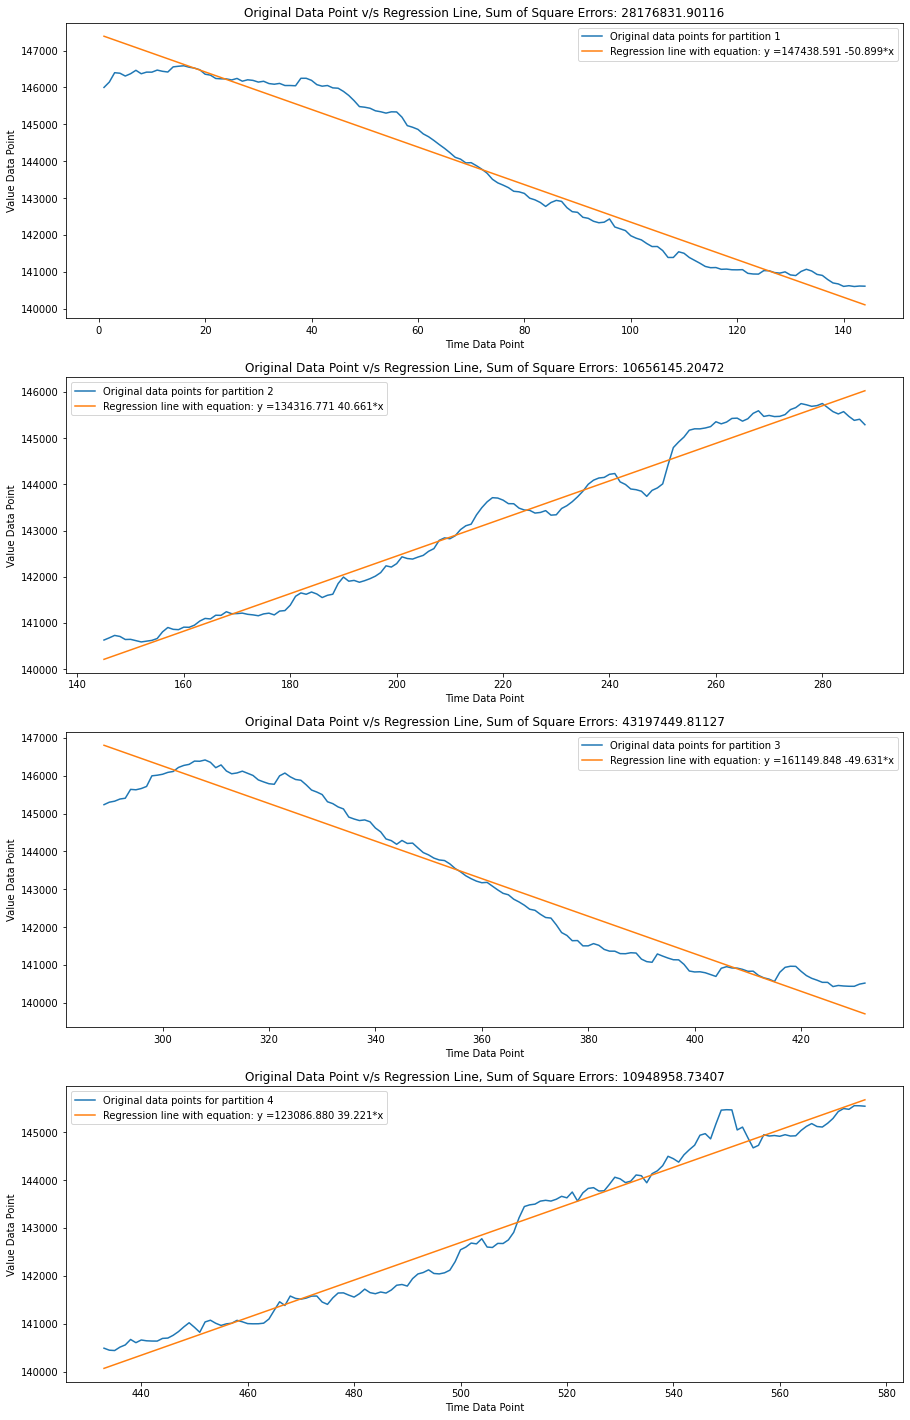

In [0]:
fig, ax = plt.subplots(figsize=(15,25))
sse_errors = []
for index in range(len(partition_data)):
  plt.subplot(4,1,index+1)
  
  current_data = partition_data[index]

  data_n = current_data.shape[0]
  x_mean = current_data.mean(axis=0)[0]
  y_mean = current_data.mean(axis=0)[1]

  sum_x_i_y_i = np.sum(current_data.time*current_data.value)
  sum_x_i_x_i = np.sum(current_data.time*current_data.time)

  beta_1 = (sum_x_i_y_i - data_n*x_mean*y_mean) / (sum_x_i_x_i - data_n*x_mean*x_mean)
  beta_0 = (y_mean - beta_1*x_mean)

  y_cap = beta_0 + beta_1*current_data.time

  sse = np.sum((current_data.value - (beta_0 + beta_1*current_data.time))*(current_data.value - (beta_0 + beta_1*current_data.time)))
  sse_errors.append(sse)

  plt.plot(current_data.time, current_data.value, label = "Original data points for partition "+str(index+1));
  plt.plot(current_data.time, y_cap, label = "Regression line with equation: y =" + "{:.3f}".format(beta_0)+" "+"{:.3f}".format(beta_1)+"*x")

  plt.xlabel('Time Data Point')
  plt.ylabel('Value Data Point')
  plt.title('Original Data Point v/s Regression Line, Sum of Square Errors: '+"{:.5f}".format(sse))
  plt.legend()  

In [0]:
for index in range(4):
  print('Sum of Square Errors in case: '+str(index+1)+" is: "+"{:.5f}".format(sse_errors[index]))

Sum of Square Errors in case: 1 is: 28176831.90116
Sum of Square Errors in case: 2 is: 10656145.20472
Sum of Square Errors in case: 3 is: 43197449.81127
Sum of Square Errors in case: 4 is: 10948958.73407
